<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Principle Component Analysis**


![img](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/PCA.jpeg)

Estimated time needed: **45** minutes


## Use cases of PCA

*   Facial Recognition
*   Image Compression
*   Finding patterns in data of high dimension in the field of quantitative finance.

For instance, suppose you are a fund manager who has 200 stocks in a portfolio. To analyze the potential movements and relationships of the stocks, you would need to  at least work with a 200$\times$200 correlation or covariance matrix, which is very complex.

However, instead of looking at 200 stock variances, would it be more efficient to just look at 10 most dominant/principal directions of variances that best represent the original variances of the stocks?

PCA is a methodology to reduce the dimensionality of a complex problem.

<img src='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/fundmanager.jpg' style="width: 70%">


In this notebook, you will explore how to simplify and reduce the dimensionality of various data using **principle component analysis** (PCA)


## **Table of Contents**

<!-- <a href="#Principle-Component-Analysis">Principle Component Analysis</a> -->

<ol>
    <li><a href="https://#Objectives">Objectives</a></li>
    <li><a href="https://#Datasets">Datasets</a></li>
    <li>
        <a href="https://#Setup">Setup</a>
        <ol>
            <li><a href="https://#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="https://#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="https://#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li>
        <a href="https://#Background">Background</a>
        <ol>
            <li><a href="https://##What-does-PCA-do?">What does PCA do?</a></li>
            <li><a href="https://#How-does-PCA-work?-(optional)">How does PCA work? (optional)</a></li>
        </ol>
    </li>
    <li>
        <a href="https://##Visual-Example">Visual Example</a>
        <ol>
            <li><a href="https://#Scaling-data">Scaling Data</a></li>
            <li><a href="https://#Applying-PCA">Applying PCA</a></li>
            <li><a href="https://#Putting-it-all-Together">Putting it all Together</a></li>
        </ol>
    </li>
    <li>
        <a href="https://#Using-PCA-to-Improve-Facial-Recognition">Using PCA to Improve Facial Recognition</a>
    </li>
</ol>

<a href="https://#Exercises">Exercises</a>

<ol>
    <li><a href="https://#Exercise-1---Scaling-the-Data">Exercise 1 - Scaling the Data</a></li>
    <li><a href="https://#Exercise-2---Fitting-PCA-Object">Exercise 2 - Fitting PCA Object</a></li>
    <li><a href="https://#Exercise-3---Finding-Desired-Number-of-Components">Exercise 3 - Finding Desired Number of Components</a></li>
    <li><a href="https://#Exercise-4---Dimensionality-Reduction">Exercise 4 - Dimentionality Reduction</a></li>
</ol>


***


## Objectives


After completing this lab you will be able to:


*   **Understand** what PCA is and how (generally) it works.
*   **Understand** when PCA is useful.
*   **Apply** PCA effectively.


## Datasets

Datasets for this lab are gathered from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) under the MIT License.


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for additional plotting tools.


### Installing Required Libraries

The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or locally) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install pandas==1.3.4 ..."

# This cell contains commented-out installation commands for required libraries
# The -qy flag means: q=quiet (minimal output), y=yes (automatic yes to prompts)
# These specific versions ensure compatibility with the lab exercises

### Importing Required Libraries


In [ ]:
%matplotlib inline
# Suppress warnings from using older version of sklearn:
def warn(*args, **kwargs):  # Custom function that accepts any arguments but does nothing
    pass  # No operation - effectively silences all warnings
import warnings  # Import warnings module to control warning messages
warnings.warn = warn  # Override the default warn function with our custom one

from tqdm import tqdm  # Progress bar for loops and iterations
import numpy as np  # Numerical computing library for arrays and mathematical operations
import pandas as pd  # Data manipulation and analysis library for DataFrames
from itertools import accumulate  # Iterator for cumulative sums/operations

import matplotlib.pyplot as plt  # Plotting library for creating visualizations
import seaborn as sns  # Statistical data visualization library built on matplotlib
# Display plots directly in Jupyter notebook

from sklearn.preprocessing import StandardScaler  # Standardize features by removing mean and scaling to unit variance
from sklearn.decomposition import PCA  # Principal Component Analysis for dimensionality reduction
from sklearn.model_selection import train_test_split  # Split data into training and testing sets
from sklearn.model_selection import RandomizedSearchCV  # Randomized search for hyperparameter tuning
from sklearn.datasets import fetch_lfw_people  # Load Labeled Faces in the Wild dataset
from sklearn.metrics import classification_report  # Generate classification metrics report
from sklearn.metrics import confusion_matrix  # Compute confusion matrix for classification evaluation
from sklearn.svm import SVC  # Support Vector Classification algorithm
from scipy.stats import loguniform  # Log-uniform distribution for hyperparameter sampling

warnings.filterwarnings('ignore')  # Ignore all warning messages during execution

sns.set_context('notebook')  # Set seaborn plotting context for notebook display
sns.set_style('white')  # Set seaborn plotting style to white background

### Defining Helper Functions

Below, we define helper functions to simplify your code later on:


In [ ]:
def plot_explained_variance(pca):
    # This function graphs the accumulated explained variance ratio for a fitted PCA object.
    # Parameter: pca - a fitted PCA object from sklearn.decomposition.PCA
    
    # Calculate cumulative sum of explained variance ratios and unpack into a list
    acc = [*accumulate(pca.explained_variance_ratio_)]
    
    # Create figure and axis objects: 1 row, 1 column, size 50x20 inches
    fig, ax = plt.subplots(1, figsize=(50, 20))
    
    # Create stacked area plot showing cumulative variance explained by components
    ax.stackplot(range(pca.n_components_), acc)
    
    # Add scatter points at each component position for better visibility
    ax.scatter(range(pca.n_components_), acc, color='black')
    
    # Set y-axis limits from 0 to 1 (0% to 100% variance)
    ax.set_ylim(0, 1)
    
    # Set x-axis limits from 0 to the last component index
    ax.set_xlim(0, pca.n_components_-1)
    
    # Set tick label font size for both axes to 36 points
    ax.tick_params(axis='both', labelsize=36)
    
    # Set x-axis label with font size 48
    ax.set_xlabel('N Components', fontsize=48)
    
    # Set y-axis label with font size 48
    ax.set_ylabel('Accumulated explained variance', fontsize=48)
    
    # Adjust subplot parameters to fit the figure area tightly
    plt.tight_layout()
    
    # Display the plot
    plt.show()

## Background

Before we begin using **PCA**, we should first understand:

1.  What PCA does
2.  How PCA Works


### What does PCA do?

*   Reduces the dimensionality of data. By reducing data dimensionality, PCA can also help with visualization.
*   May reduce noise in the process

\-Can be used to pre-process data improving the result of your algorithm


## Visual Example

Let's look at an example that will visually demonstrate PCA in action.

Load the dataset `HeightsWeights.csv` which contains a list of various people's heights (in inches) and weight (in pounds and kg):


In [ ]:
# Load the HeightsWeights.csv dataset from the cloud storage
# pd.read_csv() reads CSV file into a pandas DataFrame
# index_col=0 parameter sets the first column as the index
hwdf = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/HeightsWeights.csv', index_col=0)

# Display the first 5 rows of the DataFrame to preview the data
hwdf.head()

### Scaling data

**You should (almost) always scale your data before applying PCA**

**Why?**: There are many reasons, here are some:

*   Scaling your features make the features have the same standard deviation => same weight.

*   If the features have the same weight, PCA is able to best find the most significant components (principal components) without being biased towards features with high variance.

*   Computers do not do well in adding large numbers and small numbers, so, if all data is in the same range  algorithms usually perform better.

Let's use the `StandardScaler` from `sklearn.preprocessing`:


In [ ]:
# Create a StandardScaler object to standardize features
scaler = StandardScaler()

# Fit the scaler to the data and transform it in one step
# fit_transform() computes mean and std for each feature, then standardizes the data
# [:] notation preserves the DataFrame structure while replacing values
hwdf[:] = scaler.fit_transform(hwdf)

# Rename columns to indicate they have been scaled
# f-string creates new column names by appending " (scaled)" to each original column name
hwdf.columns = [f'{c} (scaled)' for c in hwdf.columns]

# Display the first 5 rows of the scaled DataFrame
hwdf.head()

### StandardScaler Formula

The `StandardScaler` standardizes features by removing the mean and scaling to unit variance. The formula for standardization is:

$$z = \frac{x - \mu}{\sigma}$$

Where:
- $z$ is the standardized value
- $x$ is the original value
- $\mu$ is the mean of the feature
- $\sigma$ is the standard deviation of the feature

This transformation ensures that each feature has a mean of 0 and a standard deviation of 1, which is important for PCA because it prevents features with larger scales from dominating the principal components.

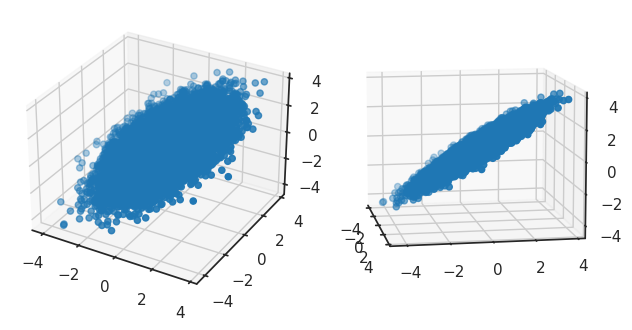

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
xs, ys, zs = [hwdf[attr] for attr in hwdf.columns]
ax1.scatter(xs, ys, zs)

ax2 = fig.add_subplot(122, projection='3d')
xs, ys, zs = [hwdf[attr] for attr in hwdf.columns]
ax2.view_init(elev=10, azim=-10)
ax2.scatter(xs, ys, zs)

plt.tight_layout()
plt.show()

In [ ]:
# Calculate correlation matrix for all features in the DataFrame
# corr() computes pairwise correlation coefficients between columns
# style.background_gradient() applies color gradient based on correlation values
# cmap='coolwarm' uses a color map where warm colors (red) = high correlation, cool colors (blue) = low correlation
hwdf.corr().style.background_gradient(cmap='coolwarm')

### Correlation Coefficient Formula

The Pearson correlation coefficient measures the linear relationship between two variables:

$$r_{xy} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}}$$

Where:
- $r_{xy}$ is the correlation coefficient between variables x and y
- $x_i, y_i$ are individual data points
- $\bar{x}, \bar{y}$ are the means of x and y
- $n$ is the number of data points

The correlation coefficient ranges from -1 to +1:
- $r = +1$: perfect positive correlation
- $r = 0$: no correlation
- $r = -1$: perfect negative correlation

In [8]:
hwdf.corr().style.background_gradient(cmap='coolwarm')

,Height(Inches) (scaled),Weight(Pounds) (scaled),Weight(Kilograms) (scaled)
Height(Inches) (scaled),1.000000,0.502859,0.502859
Weight(Pounds) (scaled),0.502859,1.000000,1.000000
Weight(Kilograms) (scaled),0.502859,1.000000,1.000000


We see the weights are perfectly correlated, which means **Weight(Pounds)** tells us everything we need to know about **Weight(Kilograms)** ,thus we have clearly **redundant** data! Although, this example is exaggerated, it'll help demonstrate where PCA shines.


### Applying PCA

It's time to apply PCA, let's first apply PCA keeping the same dimension as the original data, i.e.: `n_components=3`.


In [ ]:
# Transform the original data into the principal component space
# transform() projects the data onto the principal components
# Xhat is the new representation of the data in the reduced feature space
Xhat = pca.transform(hwdf)

# Display the shape of the transformed data (rows, columns)
Xhat.shape

We can find the projection of the dataset onto the principal components call it `Xhat` , this is our "new" dataset, it is the same shape as the original dataset


In [ ]:
# Create a DataFrame from the PCA-transformed data
# columns parameter creates column names like "Projection on Component 1", "Projection on Component 2", etc.
# range(len(hwdf.columns)) generates indices 0, 1, 2, ... for each component
# i+1 converts zero-based indexing to one-based for better readability
hwdf_PCA = pd.DataFrame(columns=[f'Projection on Component {i+1}' for i in range(len(hwdf.columns))], data=Xhat)

# Display the first 5 rows of the PCA-transformed data
hwdf_PCA.head()

Let’s look at the new dataset as a dataframe.


In [ ]:
# Define colors for each principal component (red, red, green)
colors = ['red', 'red', 'green']

# Create a figure with two 3D subplots side by side, size 12x8 inches
fig = plt.figure(figsize=(12,8))

# First subplot: left view
ax1 = fig.add_subplot(121, projection='3d')

# Extract x, y, z coordinates from the scaled data
xs, ys, zs = [hwdf[attr] for attr in hwdf.columns]

# Set viewing angle: elevation=10 degrees, azimuth=75 degrees
ax1.view_init(elev=10, azim=75)

# Create scatter plot of the original data points
ax1.scatter(xs, ys, zs)

# Draw arrows representing principal components starting from origin [0,0,0]
# Each arrow is scaled by 8 to make them visible
# zip() pairs each component with its corresponding color
for component, color in zip(pca.components_, colors):
    ax1.quiver(*[0, 0, 0], *(8 * component), color=color)

    
# Second subplot: right view
ax2 = fig.add_subplot(122, projection='3d')

# Extract x, y, z coordinates again
xs, ys, zs = [hwdf[attr] for attr in hwdf.columns]

# Set different viewing angle: elevation=0 degrees, azimuth=0 degrees
ax2.view_init(elev=0, azim=0)

# Create scatter plot of the original data points
ax2.scatter(xs, ys, zs)

# Draw arrows representing principal components from origin
for component, color in zip(pca.components_, colors):
    ax2.quiver(*[0, 0, 0], *(8 * component), color=color)

# Display the plots
plt.show()

# Print the explained variance ratio for each component
# zip() pairs each color with its explained variance ratio
# ev * 100 converts ratio to percentage
for color, ev in zip(colors, pca.explained_variance_ratio_):
    print(f'{color} component accounts for {ev * 100:.2f}% of explained variance')

**Why** are the values in the third column all essentially zero?

Let's look at the principle components:


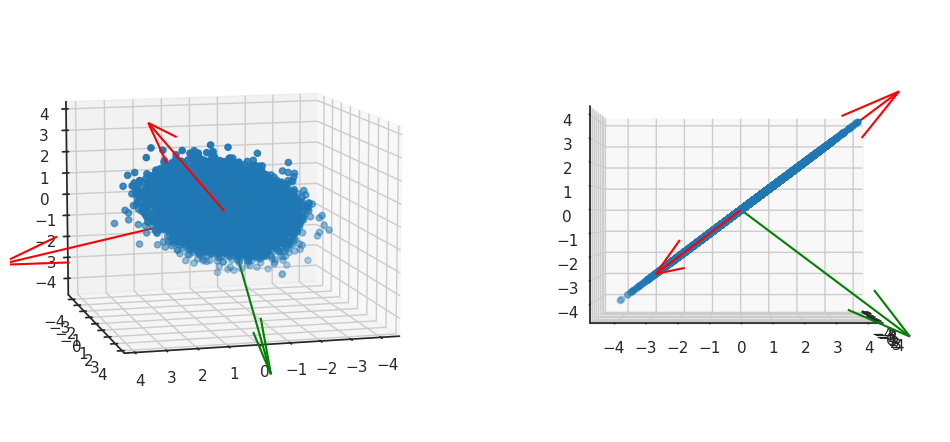

red component accounts for 78.98% of explained variance
red component accounts for 21.02% of explained variance
green component accounts for 0.00% of explained variance


In [12]:
colors = ['red', 'red', 'green']

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(121, projection='3d')
xs, ys, zs = [hwdf[attr] for attr in hwdf.columns]
ax1.view_init(elev=10, azim=75)
ax1.scatter(xs, ys, zs)

for component, color in zip(pca.components_, colors):
    ax1.quiver(*[0, 0, 0], *(8 * component), color=color)

    
ax2 = fig.add_subplot(122, projection='3d')
xs, ys, zs = [hwdf[attr] for attr in hwdf.columns]
ax2.view_init(elev=0, azim=0)
ax2.scatter(xs, ys, zs)

for component, color in zip(pca.components_, colors):
    ax2.quiver(*[0, 0, 0], *(8 * component), color=color)

plt.show()

for color, ev in zip(colors, pca.explained_variance_ratio_):
    print(f'{color} component accounts for {ev * 100:.2f}% of explained variance')

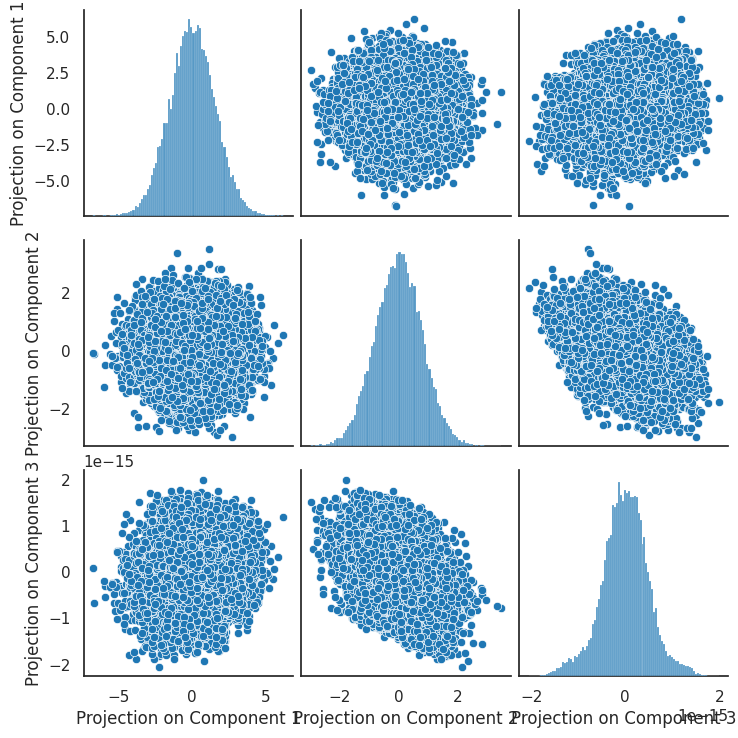

In [13]:
sns.pairplot(hwdf_PCA)
plt.show()

In [ ]:
# Drop the third component column since it explains very little variance
# axis=1 specifies dropping a column (not a row)
# inplace=True modifies the DataFrame directly without creating a copy
hwdf_PCA.drop('Projection on Component 3', axis=1, inplace=True)

# Display the first 5 rows of the reduced DataFrame
hwdf_PCA.head()

As you can see, the correlations of the 3 principal components are now zero, meaning we have successfully de-correlated `hwdf` and obtained features that are linearly independent of each other.

Each component provides variance/information on a different direction. As we saw before that, the third component had a small projection, which means it doesn't provide much information about our original data `hwdf` in the new feature space.

Thus, we can remove the third dimension, while still keeping the vast majority of our data's information:


In [15]:
hwdf_PCA.drop('Projection on Component 3', axis=1, inplace=True)
hwdf_PCA.head()

,Projection on Component 1,Projection on Component 2
0,-2.051774,-0.243847
1,1.866218,1.117813
2,3.133436,-0.794420
3,1.696186,-0.748473
4,1.803402,-1.058234


Now that you have some intuition behind PCA, let's start from the beginning and understand the PCA-pipeline.

In **sklearn.decomposition.PCA**, there is a parameter called `whiten` which helps standardize your input data if you set `whiten = True`. You could also use `StandardScaler()` as a separate step before using PCA.


In [ ]:
# Plot the cumulative explained variance for all principal components
# This helps determine how many components are needed to retain desired variance
plot_explained_variance(pca)

By default, `sklearn.decomposition.PCA` sorts the components by their explained variance.

Let's analyze the explained variance ratios:


In [ ]:
# Set the threshold for explained variance (99% = 0.99)
threshold = 0.99

# Find the minimum number of components needed to reach the threshold
# enumerate() provides index i starting from 1 for each accumulated variance value
# accumulate() computes cumulative sum of explained variance ratios
# next() returns the first index where cumulative variance >= threshold
num = next(i for i, x in enumerate(accumulate(pca.explained_variance_ratio_), 1) if x >= threshold)

# Print the results showing how many components to keep and discard
print(f'We can keep the first {num} components and discard the other {pca.n_components_-num},')
print(f'keeping >={100 * threshold}% of the explained variance!')

In [18]:
threshold = 0.99
num = next(i for i, x in enumerate(accumulate(pca.explained_variance_ratio_), 1) if x >= threshold)
print(f'We can keep the first {num} components and discard the other {pca.n_components_-num},')
print(f'keeping >={100 * threshold}% of the explained variance!')

We can keep the first 2 components and discard the other 1,
keeping >=99.0% of the explained variance!


In [19]:
X_PCA.drop([f'Component {i}' for i in range(num, pca.n_components_)], axis=1, inplace=True)
X_PCA.head()

,Component 0,Component 1
Index,,
1,-2.051774,-0.243847
2,1.866218,1.117813
3,3.133436,-0.794420
4,1.696186,-0.748473
5,1.803402,-1.058234


Load the Labeled Faces in the Wild (LFW) people datasetclassification


In [ ]:
# Introspect the images arrays to find the shapes (for plotting)
# N = number of images, h = height of each image, w = width of each image
N, h, w = lfw_people.images.shape

# Extract the list of target names (person names) from the dataset
target_names = lfw_people.target_names

Introspect the images arrays to find the shapes (for plotting)


In [ ]:
# Extract the target labels (person IDs) - integer encoding for each person
y = lfw_people.target

# Extract the flattened image data - each row is one image reshaped to 1D array
X = lfw_people.data

# Get the number of features (pixels) in each flattened image
n_features = X.shape[1]

We load our features <code>X</code> and labels <code>y</code>. The images are flattened such that each one is a row in the NumPy array <code>X</code>


In [ ]:
# Loop through each unique person in the dataset
for person in np.unique(lfw_people.target):
    # Find the first image index for this person
    # argmax returns the first True (maximum) value where target equals person
    idx = np.argmax(lfw_people.target == person)
    
    # Display the image in grayscale
    plt.imshow(lfw_people.images[idx], cmap='gray')
    
    # Set the title to the person's name
    plt.title(lfw_people.target_names[person])
    
    # Show the plot
    plt.show()

We plot out each class and an image belonging to that class:


In [ ]:
# Split the data into training and testing sets
# X = feature data (images), y = target labels (person IDs)
# test_size=0.25 means 25% of data for testing, 75% for training
# random_state=42 ensures reproducible random splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

We split the data into training and testing


In [ ]:
# Define hyperparameter search space for SVM
# C: regularization parameter, controls trade-off between smooth decision boundary and classifying training points correctly
# gamma: kernel coefficient, defines how far the influence of a single training example reaches
param_grid = {
    "C": loguniform(1e3, 1e5),  # Sample C values logarithmically from 1000 to 100000
    "gamma": loguniform(1e-4, 1e-1)  # Sample gamma values logarithmically from 0.0001 to 0.1
}

# Create a randomized search cross-validation object
# SVC with RBF (Radial Basis Function) kernel for non-linear classification
# class_weight="balanced" adjusts weights inversely proportional to class frequencies
# n_iter=10 means try 10 random combinations of hyperparameters
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)

# Fit the model on training data - this performs hyperparameter search and trains the best model
clf = clf.fit(X_train, y_train)

### SVM with RBF Kernel Formula

The Radial Basis Function (RBF) kernel is used to map data into a higher-dimensional space for non-linear classification:

$$K(x, x') = \exp(-\gamma \|x - x'\|^2)$$

Where:
- $K(x, x')$ is the kernel function measuring similarity between two data points
- $x$ and $x'$ are two data points (feature vectors)
- $\gamma$ is the kernel coefficient (controls the influence radius of a single training example)
- $\|x - x'\|^2$ is the squared Euclidean distance between the two points

The SVM decision function is:

$$f(x) = \text{sign}\left(\sum_{i=1}^{n} \alpha_i y_i K(x_i, x) + b\right)$$

Where:
- $\alpha_i$ are the Lagrange multipliers (learned during training)
- $y_i$ are the class labels
- $b$ is the bias term
- $C$ is the regularization parameter that controls the trade-off between maximizing the margin and minimizing classification error

# Make predictions on the test set using the trained classifier
y_pred = clf.predict(X_test)

In [25]:
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1)
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(X_train, y_train)

In [26]:
y_pred = clf.predict(X_test)

Let's see how well our `SVC` did on the test data:


In [ ]:
# Create and fit a PCA object on the training data
# svd_solver='full' uses standard SVD (Singular Value Decomposition) for computing components
# whiten=True normalizes components to have unit variance (important for classification)
pca = PCA(svd_solver='full',  whiten=True).fit(X_train)

We see all the images are being classifed as George Bush. Clearly it's having trouble differentiating between the faces.


# Select the index of the person to analyze (1 = second person in the dataset)
person_index=1

In [ ]:
# Transform the selected person's image into PCA component space
# X[person_index,:] selects one image as a 1D array
# reshape(1, -1) converts it to a 2D array with 1 row (required by PCA.transform)
# Xhat contains the projections onto all principal components
Xhat=pca.transform(X[person_index,:].reshape(1, -1))

We find the projections on to each principle  component for a person int the dataset, we select the sample <code>person_index</code> :


In [ ]:
# Reconstruct the image from PCA components
# inverse_transform() converts PCA components back to original image space
# reshape(h, w) converts 1D array back to 2D image of height h and width w
plt.imshow(pca.inverse_transform(Xhat).reshape(h, w), cmap='gray')
plt.title("Image after PCA and inverse transform"  ) 
plt.show()

# Display the original image for comparison
plt.imshow(lfw_people.images[person_index],cmap='gray')
plt.title("Image")
plt.show()

In [30]:
Xhat=pca.transform(X[person_index,:].reshape(1, -1))

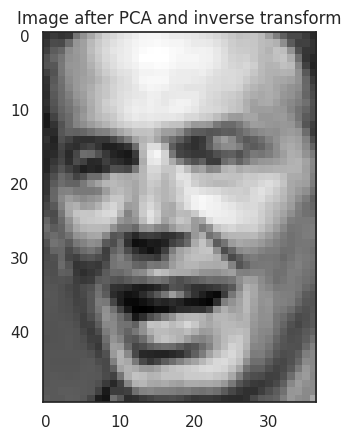

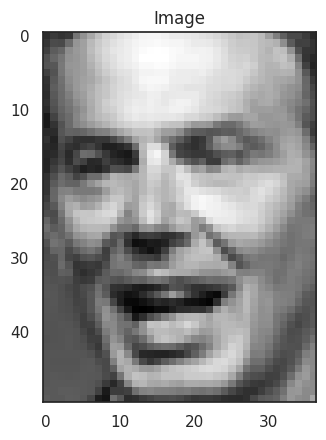

In [31]:
plt.imshow(pca.inverse_transform(Xhat).reshape(h, w), cmap='gray')
plt.title("Image after PCA and inverse transform"  ) 
plt.show()
plt.imshow(lfw_people.images[person_index],cmap='gray')
plt.title("Image")
plt.show()

We can use the Explained variance-ratio to determine the number of components to keep, we can plot it as Cumulative distribution.


In [ ]:
# Set the variance threshold at 60% (0.60)
threshold = 0.60

It looks like 150 components explain over 95% of the variance, usually 80% will do, let’s try and visualize some components.

<p>
<b>Note:</b> you can use Cross-validation to select the number of components  
</p>


In [33]:
threshold = 0.60

In [34]:
components = np.cumsum(pca.explained_variance_ratio_) < threshold
components.sum()

np.int64(8)

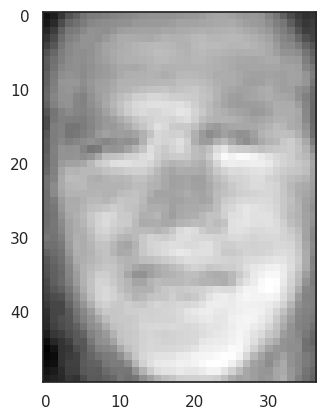

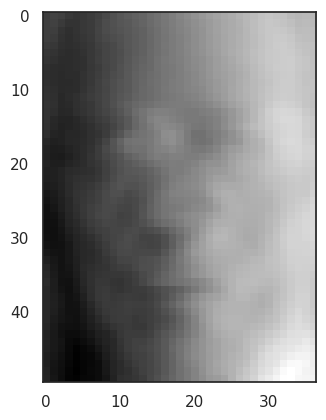

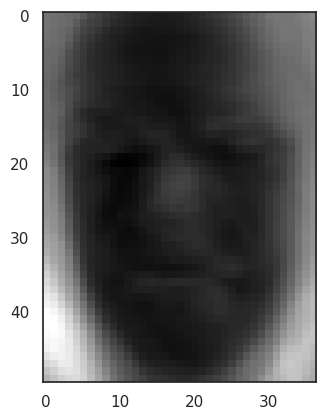

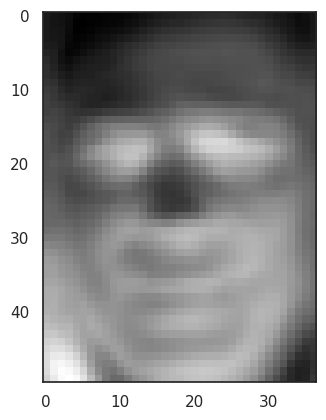

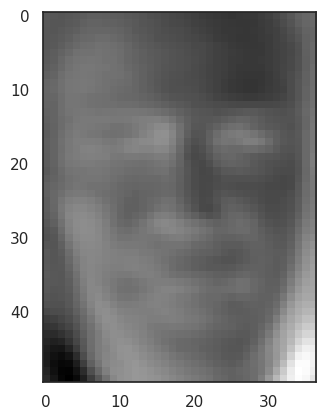

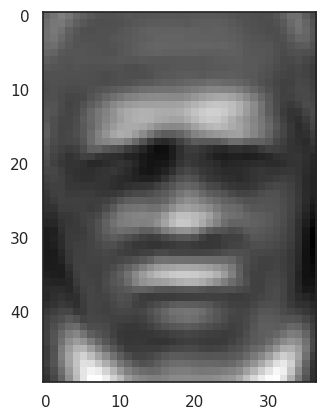

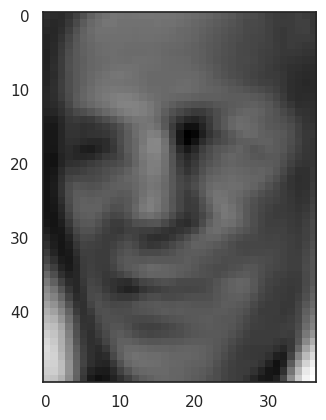

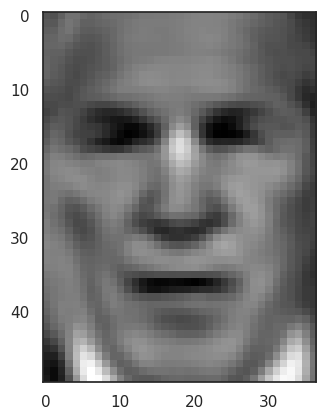

In [35]:
for component in pca.components_[components,:]:
    plt.imshow(component.reshape(h, w),cmap='gray')
    plt.show()

In [36]:
pca = PCA(n_components=150, svd_solver="randomized", whiten=True).fit(X_train)

In [ ]:
# Create a figure with 2 subplots side by side, size 8x4 inches
plt.figure(figsize=(8, 4))

# First subplot: original image
plt.subplot(1,2,1)  # 1 row, 2 columns, 1st position
plt.imshow(lfw_people.images[person_index,:,:],cmap='gray')
plt.title("Original image")

# Second subplot: PCA transformed and reconstructed image
plt.subplot(1,2,2)  # 1 row, 2 columns, 2nd position
# Transform image to PCA space, then inverse transform back to image space
# reshape(1, -1) converts to 2D array for transform, then reshape(h, w) converts back to image
plt.imshow(pca.inverse_transform(pca.transform(X[person_index ,:].reshape(1, -1))).reshape(h, w),cmap='gray')
plt.title("PCA transformed and inverse-transformed image ") 

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

**NOTE**: We can also transform the data back ("inverse_transform") to its original space, with the rest of the components to zero, then convert it to an image. For instance, let's look at one of the images using <code>person_index = 1</code>


In [ ]:
# Define hyperparameter search space for SVM
param_grid = {
    "C": loguniform(1e3, 1e5),  # Regularization parameter, sampled logarithmically
    "gamma": loguniform(1e-4, 1e-1),  # Kernel coefficient, sampled logarithmically
}

# Create randomized search object with SVM classifier
# Uses PCA-transformed data this time for improved performance
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)

# Fit the model on PCA-transformed training data
# This searches for best hyperparameters and trains the model
clf = clf.fit(X_train_pca, y_train)

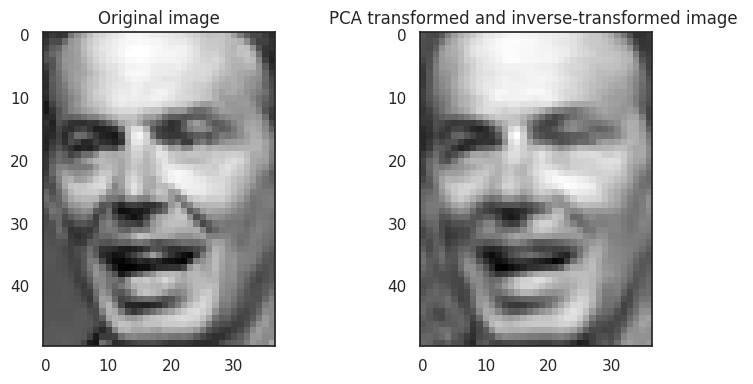

In [39]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.imshow(lfw_people.images[person_index,:,:],cmap='gray')
plt.title("Original image")

plt.subplot(1,2,2)
plt.imshow(pca.inverse_transform(pca.transform(X[person_index ,:].reshape(1, -1))).reshape(h, w),cmap='gray')
plt.title("PCA transformed and inverse-transformed image ") 

plt.tight_layout()
plt.show()

In [ ]:
# Create a heatmap of the confusion matrix for PCA-enhanced predictions
# Shows how well the model performs with PCA dimensionality reduction
hmap = sns.heatmap(
    confusion_matrix(y_test, y_pred),  # Compare true labels with predictions
    annot=True,  # Display count values in cells
    xticklabels=lfw_people.target_names,  # Use person names on x-axis
    yticklabels=lfw_people.target_names,  # Use person names on y-axis
    fmt='g'  # Format numbers without scientific notation
)

# Set axis labels
hmap.set_xlabel('Predicted Value')
hmap.set_ylabel('Truth Value')

We see the model using PCA performs much better!


In [ ]:
# Load the energy dataset from cloud storage
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/energydata_complete.csv')

# Remove the 'date' column as it's not needed for PCA analysis
# axis=1 specifies column removal
# inplace=True modifies the DataFrame directly
df.drop('date', axis=1, inplace=True)

# Drop any rows with missing values and convert all data to float64 type
# dropna() removes rows with NaN values
# astype(np.float64) ensures all values are 64-bit floating point numbers
df = df.dropna().astype(np.float64)

# Display the first 5 rows of the cleaned dataset
df.head()

Text(46.24999999999999, 0.5, 'Truth Value')

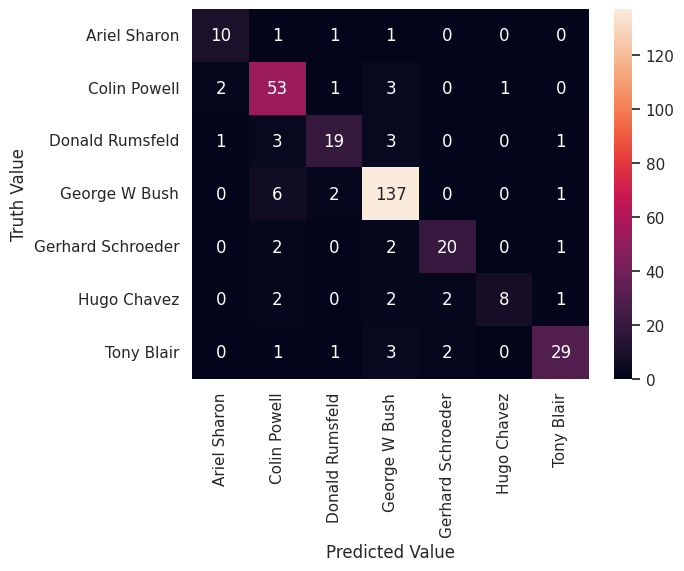

In [42]:
hmap = sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    xticklabels=lfw_people.target_names,
    yticklabels=lfw_people.target_names,
    fmt='g'
)
hmap.set_xlabel('Predicted Value')
hmap.set_ylabel('Truth Value')

# Exercises

Run the following code cell to complete the exercises

We download and clean the dataset `energydata_complete.csv` containing real-world energy data:


In [43]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/energydata_complete.csv')
df.drop('date', axis=1, inplace=True)
df = df.dropna().astype(np.float64)
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60.0,30.0,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60.0,30.0,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50.0,30.0,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50.0,40.0,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60.0,40.0,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## Exercise 1 - Scaling the Data


Scale the data in `df` using sklearn.preprocessing.StandardScaler

(You don't need to change the names of the columns like we did in the examples).


In [44]:
scaler = StandardScaler()
df[:] = scaler.fit_transform(df)
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,-0.367676,3.301264,-1.118645,1.843821,-0.520411,1.073683,-1.235063,1.686130,-0.908217,1.506438,...,-1.217324,0.958136,-0.152647,-2.976328,0.82208,1.207694,2.091596,0.366975,-0.807974,-0.807974
1,-0.367676,3.301264,-1.118645,1.616807,-0.520411,1.057097,-1.235063,1.704566,-0.908217,1.604528,...,-1.200778,0.965363,-0.174588,-2.962813,0.82208,1.071703,1.766584,0.343135,-0.440240,-0.440240
2,-0.465215,3.301264,-1.118645,1.517959,-0.520411,1.033550,-1.235063,1.748608,-0.944115,1.580918,...,-1.233869,0.950910,-0.196529,-2.949298,0.82208,0.935713,1.441572,0.319294,0.252109,0.252109
3,-0.465215,4.561378,-1.118645,1.459321,-0.520411,1.024540,-1.235063,1.769092,-0.962063,1.542526,...,-1.233869,0.926821,-0.218470,-2.935783,0.82208,0.799723,1.116559,0.295454,1.408801,1.408801
4,-0.367676,4.561378,-1.118645,1.526336,-0.520411,1.009797,-1.235063,1.769092,-0.962063,1.497991,...,-1.233869,0.926821,-0.240411,-2.922268,0.82208,0.663733,0.791547,0.271613,-1.028122,-1.028122


## Exercise 2 - Fitting PCA Object


Create a `PCA` object called `pca` and fit it to the dataframe `df`

(You don't need to change the names of the columns).


In [45]:
pca = PCA()
pca.fit(df)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


## Exercise 3 - Finding Desired Number of Components


Find the minimum number of components that cover a total explained variance of $95%$ or more


In [ ]:
# Exercise 3: Find minimum number of components for 95% explained variance
# cumsum() computes cumulative sum of explained variance ratios
# >= 0.95 creates boolean array where cumulative variance meets or exceeds 95%
# argwhere() finds indices where condition is True
# [0][0] gets the first such index
# + 1 converts from zero-based index to count of components
np.argwhere(pca.explained_variance_ratio_.cumsum() >= 0.95)[0][0] + 1

np.int64(12)

## Exercise 4 - Dimensionality Reduction


Reduce your dataset to one with PCA applied to it, where the new number of dimensions is the answer you got in the Exercise 3.

Assign the result to a variable called `reduced_data`. (No need to convert the result to a `pandas.DataFrame`).

Hint: It might be easiest to use a new `PCA` object using the [`n_components` parameter](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01)


In [ ]:
# Convert the reduced data to a pandas DataFrame for better visualization
# columns parameter creates column names "Component 0", "Component 1", ..., "Component 11"
# range(reduced_data.shape[1]) generates indices from 0 to 11 (12 components)
pd.DataFrame(reduced_data, columns=[f'Component {i}' for i in range(reduced_data.shape[1])]).head()

<details>
    <summary>Click here for a Sample Solution</summary>

```python
pca = PCA(n_components=12)
reduced_data = pca.fit(df).transform(df)
```

</details>


Let's view the result as a `pandas.DataFrame`:


In [48]:
pd.DataFrame(reduced_data, columns=[f'Component {i}' for i in range(reduced_data.shape[1])]).head()

,Component 0,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Component 11
0,-2.922039,4.688402,-1.548784,1.200384,1.953325,-0.372920,2.529788,0.640358,2.475223,-0.748954,-1.448401,-0.514303
1,-2.940551,4.617382,-1.026564,1.273485,1.958929,-0.495274,2.237205,0.583417,2.463552,-0.854024,-1.437129,-0.443660
2,-2.983922,4.532971,-0.057812,1.455761,1.925351,-0.626959,1.941323,0.559629,2.499994,-0.949800,-1.460569,-0.450196
3,-3.074540,4.511345,1.503160,1.955986,2.803530,-0.560489,1.565011,0.474951,3.320774,-1.015321,-1.598426,-0.410259
4,-3.050297,4.486200,-1.798191,0.976510,2.843927,-0.700518,1.271911,0.287486,3.287537,-1.118611,-1.607082,-0.419324


# Congratulations! - You have completed the lab


## Authors

[Sam Prokopchuk](https://www.linkedin.com/in/sam-prokopchuk-1908b21a0/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01)


### Other Contributors


[Roxanne Li](https://www.linkedin.com/in/roxanne-li/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) is a Data Science intern at IBM Skills Network, entering level-5 study in the Mathematics & Statistics undergraduate Coop program at McMaster University.


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By     | Change Description          |
| ----------------- | ------- | -------------- | --------------------------- |
| 2021-12-20        | 0.1     | Sam Prokopchuk | Complete Exercises' content |
| 2022-05-20        | 0.2     | Roxanne Li     | Review and edit             |
| 2022-07-15        | 0.2     | Svitlana K     | Review and edit             |


Copyright © 2021 IBM Corporation. All rights reserved.
